In [1]:
#dania
import pandas as pd

glassTypeData = pd.read_csv('glasstypePrediction.csv')

In [2]:
#data preprocessing 1 - feature scaling
from sklearn.preprocessing import MinMaxScaler
glassType_scaler = MinMaxScaler()

print(glassType_scaler.fit(glassTypeData))

print(glassType_scaler.data_max_)

print(glassType_scaler.transform(glassTypeData))

print(glassType_scaler.transform(glassTypeData))

MinMaxScaler()
[ 1.53393 17.38     4.49     3.5     75.41     6.21    16.19     3.15
  0.51     7.     ]
[[0.43283582 0.43759398 1.         ... 0.         0.         0.        ]
 [0.28358209 0.47518797 0.80178174 ... 0.         0.         0.        ]
 [0.22080773 0.42105263 0.79064588 ... 0.         0.         0.        ]
 ...
 [0.41703248 0.54586466 0.         ... 0.52063492 0.         1.        ]
 [0.23529412 0.54887218 0.         ... 0.4984127  0.         1.        ]
 [0.26163301 0.52631579 0.         ... 0.53015873 0.         1.        ]]
[[0.43283582 0.43759398 1.         ... 0.         0.         0.        ]
 [0.28358209 0.47518797 0.80178174 ... 0.         0.         0.        ]
 [0.22080773 0.42105263 0.79064588 ... 0.         0.         0.        ]
 ...
 [0.41703248 0.54586466 0.         ... 0.52063492 0.         1.        ]
 [0.23529412 0.54887218 0.         ... 0.4984127  0.         1.        ]
 [0.26163301 0.52631579 0.         ... 0.53015873 0.         1.        ]]


In [3]:
#data preprocessing 2 - zscore
from scipy.stats import zscore

glassTypeData['ba_zscore'] = zscore(glassTypeData['Ba'])

display(glassTypeData)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,ba_zscore
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,-0.352877
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,-0.352877
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,-0.352877
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,-0.352877
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,-0.352877
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,1.783978
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,2.852405
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,2.953200
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,2.812087


In [4]:
#data preprocessing 3 - log scaling
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer_glasstype=FunctionTransformer (np.log1p)
t1=transformer_glasstype.transform (glassTypeData['Ca'])
print (t1)

0      2.277267
1      2.178155
2      2.172476
3      2.221375
4      2.204972
         ...   
209    2.320425
210    2.240710
211    2.244956
212    2.249184
213    2.263844
Name: Ca, Length: 214, dtype: float64


In [5]:
#Model 1 - Random Forest


In [6]:
#Model 2 - Ada Boost


In [7]:
#Model 3 - Gradient Boost
from sklearn.model_selection import train_test_split 
# X = glassTypeData['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
X_glasstype = glassTypeData.iloc[:,:9]
y_glasstype = glassTypeData['Type']

X_train_glasstype, X_test_glasstype, y_train_glasstype,  y_test_glasstype = train_test_split(X_glasstype, y_glasstype, random_state=104, train_size=0.8, shuffle=True)




In [8]:
# #Model 3 - Gradient Boost pt2
# from sklearn.ensemble import GradientBoostingClassifier

# n_estimators= [100,150,250]
# clf = GradientBoostingClassifier(n_estimators, learning_rate=1.0,
#     max_depth=1, random_state=0).fit(X_train, y_train)
# clf.score(X_test, y_test)

In [9]:
# # Evaluating accuracy
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# accuracy = accuracy_score(y_test,clf)
# print("Accuracy:", accuracy)

In [10]:
# Hyperparameter tuning
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import GridSearchCV

n_arr_glasstype = [100, 150, 250, 30]
l_arr_glasstype = [0.1, 0.01, 0.001]

max_features_glasstype= [2,3,4]
bootstrap_glasstype = [True,False]
oob_score_glasstype = [True,False]

param_grid_glasstype = {'n_estimators':n_arr_glasstype, 'max_features':max_features_glasstype,'bootstrap':bootstrap_glasstype, 'oob_score':oob_score_glasstype}  # Note, oob_score only makes sense when bootstrap=True!

for n in n_arr_glasstype:
  for l in l_arr_glasstype:
    gradientBoostRes_glasstype= GradientBoostingClassifier(n_estimators=n, learning_rate= l)
    gradientBoostRes_glasstype.fit(X_train_glasstype, y_train_glasstype)
    y_pred_glasstype = gradientBoostRes_glasstype.predict(X_test_glasstype)

    grid_glasstype = GridSearchCV(gradientBoostRes_glasstype,param_grid_glasstype)

print(grid_glasstype.decision_function)

<bound method BaseSearchCV.decision_function of GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.001,
                                                  n_estimators=30),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [100, 150, 250, 30],
                         'oob_score': [True, False]})>


In [11]:
newgradientBoostRes_glasstype= GradientBoostingClassifier(n_estimators=30, learning_rate= 0.001)
newgradientBoostRes_glasstype.fit(X_train_glasstype, y_train_glasstype)

y_pred_glasstype = newgradientBoostRes_glasstype.predict(X_test_glasstype)

In [12]:
acc_glasstype =[]
per_glasstype = []
rec_glasstype = []
fscore_glasstype = []

#calculating accuracy
accuracy = accuracy_score(y_test_glasstype,y_pred_glasstype)
acc_glasstype.append(accuracy)
#calculating percision
precision = precision_score(y_test_glasstype, y_pred_glasstype, average='weighted', zero_division='warn')
per_glasstype.append(precision)
#calculating recall
recall = recall_score(y_test_glasstype, y_pred_glasstype, average='weighted')
rec_glasstype.append(recall)
#calculating f1_score
f1 = f1_score(y_test_glasstype, y_pred_glasstype, average='weighted')
fscore_glasstype.append(f1)

print(acc_glasstype)
print(per_glasstype)
print(rec_glasstype)
print(fscore_glasstype)

[0.3023255813953488]
[0.0914007571660357]
[0.3023255813953488]
[0.1403654485049834]


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
cm_glasstype = confusion_matrix(y_test_glasstype, y_pred_glasstype)
cm_glasstype

array([[ 0, 18,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0]], dtype=int64)

[[ 0 18  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  3  0  0  0  0]]


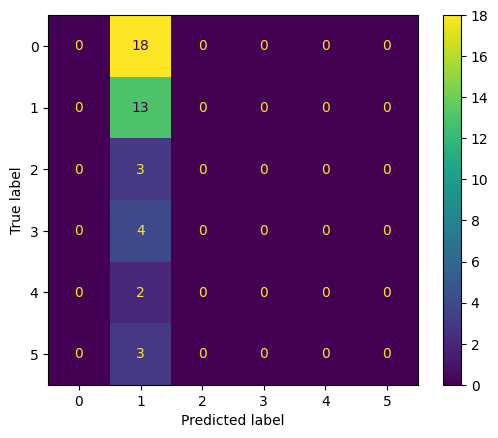

In [14]:
dm_glasstype = ConfusionMatrixDisplay(confusion_matrix=cm_glasstype)
dm_glasstype.plot()

print(cm_glasstype)

In [15]:
print(classification_report(y_test_glasstype, y_pred_glasstype))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        18
           2       0.30      1.00      0.46        13
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3

    accuracy                           0.30        43
   macro avg       0.05      0.17      0.08        43
weighted avg       0.09      0.30      0.14        43



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: U